# PageRank
![PageRank](../images/PageRanks-Example.svg.png)
![PageRank](../images/PageRanks-Example.svg.png)

<code>Objective</code>

* Build eigenvectors and eigenvalues by exploring the PageRank algorithm.
     * look at a micro-internet with fewer than 10 websites and see what it does and what can go wrong.
     * test my application of eigentheory to this problem by writing code and calculating the page rank of a large network representing a sub-section of the internet.
* Calculate the PageRank for an arbitrarily large probability matrix.

## Part 1 - Worksheet

In [1]:
# Before we begin, let's load the libraries.
%pylab notebook
import numpy as np
import numpy.linalg as la
from readonly.PageRankFunctions import *
np.set_printoptions(suppress=True)

Populating the interactive namespace from numpy and matplotlib


### PageRank as a linear algebra problem

💡 The design principle of PageRank is that important websites will be linked to by important websites.
This somewhat recursive principle will form the basis of my thinking.


A micro-internet, with just 6 websites (**A**vocado, **B**ullseye, **C**atBabel, **D**romeda, **e**Tings, and **F**aceSpace). Each website links to some of the others, and this forms a network as shown,

![A Micro-Internet](../images/internet.png/ "A Micro-Internet")


In this case scenario, I have 100 *Procrastinating Pat*s on my micro-internet, each viewing a single website at a time.
* Each minute the Pats follow a link on their website to another site on the micro-internet.
* After a while, the websites that are most linked to will have more Pats visiting them, and 
* in the long run, each minute for every Pat that leaves a website, another will enter keeping the total numbers of Pats on each website constant.
The PageRank is simply the ranking of websites by how many Pats they have on them at the end of this process.

I represent the number of Pats on each website with the vector,
$$\mathbf{r} = \begin{bmatrix} r_A \\ r_B \\ r_C \\ r_D \\ r_E \\ r_F \end{bmatrix}$$
And say that the number of Pats on each website in minute $i+1$ is related to those at minute $i$ by the matrix transformation

$$ \mathbf{r}^{(i+1)} = L \,\mathbf{r}^{(i)}$$
with the matrix $L$ taking the form,
$$ L = \begin{bmatrix}
L_{A→A} & L_{B→A} & L_{C→A} & L_{D→A} & L_{E→A} & L_{F→A} \\
L_{A→B} & L_{B→B} & L_{C→B} & L_{D→B} & L_{E→B} & L_{F→B} \\
L_{A→C} & L_{B→C} & L_{C→C} & L_{D→C} & L_{E→C} & L_{F→C} \\
L_{A→D} & L_{B→D} & L_{C→D} & L_{D→D} & L_{E→D} & L_{F→D} \\
L_{A→E} & L_{B→E} & L_{C→E} & L_{D→E} & L_{E→E} & L_{F→E} \\
L_{A→F} & L_{B→F} & L_{C→F} & L_{D→F} & L_{E→F} & L_{F→F} \\
\end{bmatrix}
$$
where the columns represent the probability of leaving a website for any other website, and sum to one.
The rows determine how likely I am to enter a website from any other, though these need not add to one.
The long time behaviour of this system is when $ \mathbf{r}^{(i+1)} = \mathbf{r}^{(i)}$, so I'll drop the superscripts here, and that allows me to write,
$$ L \,\mathbf{r} = \mathbf{r}$$

which is an eigenvalue equation for the matrix $L$, with eigenvalue 1 (this is guaranteed by the probabalistic structure of the matrix $L$).

In [45]:
# probability of clicking a link to each website when leaving Website F (FaceSpace).
L = np.array([[0,   1/2, 1/3, 0, 0,   0 ],
              [1/3, 0,   0,   0, 1/2, 0 ],
              [1/3, 1/2, 0,   1, 0,   1/2 ],
              [1/3, 0,   1/3, 0, 1/2, 1/2 ],
              [0,   0,   0,   0, 0,   0 ],
              [0,   0,   1/3, 0, 0,   0 ]])

we only care about the principal eigenvector (the one with the largest eigenvalue, which will be 1 in this case), we can use the *power iteration method* which will scale better, and is faster for large systems.

In [46]:
# peeking at the PageRank for this micro-internet.
eVals, eVecs = la.eig(L) # Gets the eigenvalues and vectors
order = np.absolute(eVals).argsort()[::-1] # Orders them by their eigenvalues
eVals = eVals[order]
eVecs = eVecs[:,order]

r = eVecs[:, 0] # Sets r to be the principal eigenvector
100 * np.real(r / np.sum(r)) # Make this eigenvector sum to one, then multiply by 100 Procrastinating Pats

array([ 16.        ,   5.33333333,  40.        ,  25.33333333,
         0.        ,  13.33333333])

👆🏽💡
* From the list we see the number of Procrastinating Pats that we expect to find on each website after long times.
* In order of *popularity* (based on this metric), the PageRank of this micro-internet is:

**C**atBabel, **D**romeda, **A**vocado, **F**aceSpace, **B**ullseye, **e**Tings


#### Using the Power-Iteration method - This method will be much better at dealing with large systems.

In [47]:
r = 100 * np.ones(6) / 6 # Seting up this vector (6 entries of 1/6 × 100 each)
r 

array([ 16.66666667,  16.66666667,  16.66666667,  16.66666667,
        16.66666667,  16.66666667])

In [48]:
r = L @ r # Applying matrix L to r
r 

array([ 13.88888889,  13.88888889,  38.88888889,  27.77777778,
         0.        ,   5.55555556])

Automation applying this matrix multiple times as follows,

In [49]:
r = 100 * np.ones(6) / 6 # Seting up this vector (6 entries of 1/6 × 100 each)
for i in np.arange(100) : # Repeating 100 times
    r = L @ r
r

array([ 16.        ,   5.33333333,  40.        ,  25.33333333,
         0.        ,  13.33333333])

running until  get to the required tolerance.

In [50]:
r = 100 * np.ones(6) / 6 # Sets up this vector (6 entries of 1/6 × 100 each)
lastR = r
r = L @ r
i = 0
while la.norm(lastR - r) > 0.01 :
    lastR = r
    r = L @ r
    i += 1
print(str(i) + " iterations to convergence.")
r

18 iterations to convergence.


array([ 16.00149917,   5.33252025,  39.99916911,  25.3324738 ,
         0.        ,  13.33433767])

The PageRank order is established fairly quickly, and the vector converges on the value we calculated earlier after a few tens of repeats.

### Damping Parameter
The system I just studied above converged fairly quickly to the correct answer.
I will now consider an extension to the micro-internet where things start to go wrong.

Say a new website is added to the micro-internet: *Geoff's* Website.
This website is linked to by *FaceSpace* and only links to itself.
![An Expanded Micro-Internet](../images/internet2.png "An Expanded Micro-Internet")

Intuitively, only *FaceSpace*, which is in the bottom half of the page rank, links to this website amongst the two others it links to, so I expect *Geoff's* site to have a correspondingly low PageRank score.

In [51]:
# Building the new L matrix for the expanded micro-internet, 
# Using Power-Iteration on the Procrastinating Pat vector.
L2 = np.array([[0,   1/2, 1/3, 0, 0,   0, 0 ],
               [1/3, 0,   0,   0, 1/2, 0, 0 ],
               [1/3, 1/2, 0,   1, 0,   0, 0 ],
               [1/3, 0,   1/3, 0, 1/2, 0, 0 ],
               [0,   0,   0,   0, 0,   0, 0 ],
               [0,   0,   1/3, 0, 0,   1, 0 ],
               [0,   0,   0,   0, 0,   0, 1 ]])

In [52]:
r = 100 * np.ones(7) / 7 # Setting up this vector (6 entries of 1/6 × 100 each)
lastR = r
r = L2 @ r
i = 0
while la.norm(lastR - r) > 0.01 :
    lastR = r
    r = L2 @ r
    i += 1
print(str(i) + " iterations to convergence.")
r

46 iterations to convergence.


array([  0.01077429,   0.00420324,   0.02131321,   0.01251789,
         0.        ,  85.66547709,  14.28571429])

👆🏽💡 That's no good! *Geoff* seems to be taking all the traffic on the micro-internet, and somehow coming at the top of the PageRank.
This behaviour can be understood, because once a Pat get's to *Geoff's* Website, they can't leave, as all links head back to Geoff.

* To combat this, I will add a small probability that the Procrastinating Pats don't follow any link on a webpage, but instead visit a website on the micro-internet at random.

* I'll say the probability of them following a link is $d$ and the probability of choosing a random website is therefore $1-d$.


* Matrix to work out where the Pat's visit each minute.

$$ M = d \, L + \frac{1-d}{n} \, J $$
where $J$ is an $n\times n$ matrix where every element is one.

* If $d$ is one, we have the case we had previously, 
* whereas if $d$ is zero, we will always visit a random webpage and therefore all webpages will be equally likely and equally ranked.
For this extension to work best, $1-d$ should be somewhat small 

In [53]:
d = 0.5 
M = d * L2 + (1-d)/7 * np.ones([7, 7]) # np.ones() is the J matrix, with ones for each entry.

In [54]:
r = 100 * np.ones(7) / 7 # Sets up this vector (6 entries of 1/6 × 100 each)
lastR = r
r = M @ r
i = 0
while la.norm(lastR - r) > 0.01 :
    lastR = r
    r = M @ r
    i += 1
print(str(i) + " iterations to convergence.")
r

8 iterations to convergence.


array([ 13.13619674,  11.11812027,  19.27885503,  14.33173875,
         7.14285714,  20.70651779,  14.28571429])

👆🏽💡 This is certainly better, the PageRank gives sensible numbers for the Procrastinating Pats that end up on each webpage.
* This method still predicts Geoff has a high ranking webpage however.
     * This could be seen as a consequence of using a small network. 

In [57]:
# function to provide the PageRank for an arbitrarily sized internet.
def pageRank(linkMatrix, d) :
    n = linkMatrix.shape[0]
    M = d * linkMatrix + (1-d)/n * np.ones([n, n])
    r = 100 * np.ones(n) / n # Sets up this vector (6 entries of 1/6 × 100 each)
    last = r
    r = M @ r
    while la.norm(last - r) > 0.01 :
        last = r
        r = M @ r
    return r


<code> Testing  code </code>

In [58]:
# function to generate internets of different sizes.
generate_internet(5)

array([[ 0.2,  0.2,  0. ,  0. ,  0. ],
       [ 0.2,  0.2,  0. ,  0. ,  0. ],
       [ 0.2,  0.2,  1. ,  0. ,  1. ],
       [ 0.2,  0.2,  0. ,  1. ,  0. ],
       [ 0.2,  0.2,  0. ,  0. ,  0. ]])

In [59]:
# Testing  PageRank method against the built in "eig" method.
L = generate_internet(100)

In [60]:
pageRank(L, 1)


array([  0.00053572,   0.0003536 ,   0.0003536 ,   0.0003536 ,
         0.0061807 ,   0.00079166,   0.00053572,   0.00047624,
         0.00548013,   0.00047624,   0.00344066,   0.0003536 ,
         0.0003536 ,   0.00225535,   0.00312437,   0.00420398,
         0.00218721,   0.00278108,   0.00381154,   0.00170109,
         0.0009468 ,   0.00140072,   0.00137978,   0.00208794,
         0.0003536 ,   0.00630368,   0.00350216,   0.00253151,
         0.00189229,   0.0003536 ,   0.00273879,   0.00642726,
         0.0009387 ,   0.00296126,   0.00044466,   0.00047624,
         0.00098202,   0.0017958 ,   0.00306999,   0.0068469 ,
         0.00596314,   0.00541714,   0.00230353,   0.00576067,
         0.00230855,   0.00307653,   0.00555144,   0.00299397,
         0.00393591,   0.00917284,   0.00515033,   0.0009468 ,
         0.00613249,   0.00227711,   0.0003536 ,   0.00101778,
         0.00044466,   0.00334972,   0.00487762,   0.00113683,
         0.00634293,   0.0054924 ,   0.00330237,   0.00

In [61]:
eVals, eVecs = la.eig(L) # Getting the eigenvalues and vectors
order = np.absolute(eVals).argsort()[::-1] # Ordering them by their eigenvalues
eVals = eVals[order]
eVecs = eVecs[:,order]

r = eVecs[:, 0]
100 * np.real(r / np.sum(r))

array([  0.00000007,   0.00000005,   0.00000005,   0.00000005,
         0.00000066,   0.00000009,   0.00000007,   0.00000006,
         0.00000059,   0.00000006,   0.00000041,   0.00000005,
         0.00000005,   0.00000026,   0.00000036,   0.00000048,
         0.00000025,   0.00000032,   0.00000043,   0.00000019,
         0.00000011,   0.00000017,   0.00000017,   0.00000024,
         0.00000005,   0.00000068,   0.00000037,   0.00000026,
         0.00000021,   0.00000005,   0.00000031,   0.00000068,
         0.00000011,   0.00000031,   0.00000006,   0.00000006,
         0.00000013,   0.0000002 ,   0.00000035,   0.00000073,
         0.00000064,   0.00000057,   0.00000026,   0.00000061,
         0.00000025,   0.00000033,   0.00000058,   0.00000031,
         0.00000042,   0.00000096,   0.00000054,   0.00000011,
         0.00000064,   0.00000025,   0.00000005,   0.00000012,
         0.00000006,   0.00000036,   0.00000053,   0.00000013,
         0.00000064,   0.00000057,   0.00000035,   0.00

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


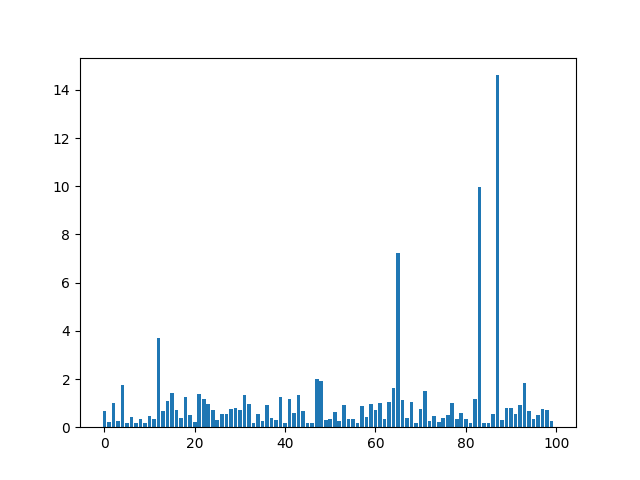

In [62]:
# PageRank graph.
%pylab notebook
r = pageRank(generate_internet(100), 0.9)
plt.bar(arange(r.shape[0]), r);

# Author 
[Helena Pedro](https://www.linkedin.com/in/helena-mbeua-pedro/) is a Data Scientist at Millennium Atlantic Bank in Angola. She is a Creative big thinker passionated about using data and optimization tools to direct decision making and solve complex and large-scale challenges.
- **Email:** mbeua94@gmail.com


© 2021